### Missionaries and Cannibals

&nbsp;

Missionaries and cannibals problem is a famous toy problem in artificial intelligence. You have one boat, three missionaries and three cannibals. The objective is to move everyone from left bank to right bank. There are two constraints. One, the boat can only take two people at most and it cannot operate without people. Two, whenever cannibals outnumber missionaries on each bank, missionaries get eaten.

Details of the game could be found in the following link

https://en.wikipedia.org/wiki/Missionaries_and_cannibals_problem

&nbsp;

In [1]:
import os
os.chdir('K:/ecole/github')
import matplotlib.pyplot as plt
import matplotlib.animation as pltani

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [2]:
#the tricky part is to convert the possibilities into a graph structure
#denote a vertex (a,b,c,d,e)
#a is the number of cannibals on left bank
#b is the number of missionaries on left bank
#c is the number of cannibals on right bank
#d is the number of missionaries on right bank
#e is the location of a boat
#denote 0 as the boat is on left bank
#1 as the boat is on right bank
#what we intend to do is to build up all the possible occasions as vertices
#and convert the valid moves from one status to another into edges
#weights are 1 for the purpose of dijkstra
def check_around():

    #to build up vertices
    #lets split all the possibilities in two
    #when the boat is on left bank and on right bank
    #when the boat is on left bank should connect to the scenario when the boat is on right bank
    #cuz we wanna ship people from left to right and boat requires a sailor
    #vice versa
    ADT=graph.graph()
    
    #lets look at the case when the boat is on left bank
    #denote i as number of cannibals on left bank
    #denote j as number of missionaries on left bank
    #and 3-i is apparently the number of cannibals on right bank
    #cuz the sum of cannibals is 3
    #the same idea applies to missionaries
    #this way would save us a lot of time from iterations
    #and the valid edges should be the boat from left bank to right bank
    #which is 0 to 1
    #the boat can only carry two people
    #there are five possible scenarios for crossing river
    for i in range(0,4):
        for j in range(0,4):
            
            #two people on boat, carry two cannibals
            #the representation of carrying two cannibals is
            #from (i,j,3-i,3-j,0) to (i-2,j,3-i+2,3-j,1)
            #two cannibals are extracted from left bank and added to the right bank
            #missionaries for both banks stay the same
            #the boat status changes from 0 to 1
            if validate(i-2,j,3-i+2,3-j):
                ADT.append((i,j,3-i,3-j,0),(i-2,j,3-i+2,3-j,1),1)
                
            #two people on boat, carry two missionaries
            if validate(i,j-2,3-i,3-j+2):
                ADT.append((i,j,3-i,3-j,0),(i,j-2,3-i,3-j+2,1),1)
                
            #two people on boat, carry one cannibal and one missionary
            if validate(i-1,j-1,3-i+1,3-j+1):
                ADT.append((i,j,3-i,3-j,0),(i-1,j-1,3-i+1,3-j+1,1),1)
            
            #only one person on boat, carry one cannibal
            if validate(i-1,j,3-i+1,3-j):
                ADT.append((i,j,3-i,3-j,0),(i-1,j,3-i+1,3-j,1),1)
            
            #only one person on boat, carry one missionary
            if validate(i,j-1,3-i,3-j+1):
                ADT.append((i,j,3-i,3-j,0),(i,j-1,3-i,3-j+1,1),1)

    #boat from right to left, vice versa
    for i in range(0,4):
        for j in range(0,4):
            if validate(i+1,j,3-i-1,3-j):
                ADT.append((i,j,3-i,3-j,1),(i+1,j,3-i-1,3-j,0),1)
            if validate(i,j+1,3-i,3-j-1):
                ADT.append((i,j,3-i,3-j,1),(i,j+1,3-i,3-j-1,0),1)
            if validate(i+2,j,3-i-2,3-j):
                ADT.append((i,j,3-i,3-j,1),(i+2,j,3-i-2,3-j,0),1)
            if validate(i,j+2,3-i,3-j-2):
                ADT.append((i,j,3-i,3-j,1),(i,j+2,3-i,3-j-2,0),1)
            if validate(i+1,j+1,3-i-1,3-j-1):
                ADT.append((i,j,3-i,3-j,1),(i+1,j+1,3-i-1,3-j-1,0),1)
                
    return ADT

In [3]:
#validate the possibility of connecting two scenarios
def validate(a,b,c,d):
    
    #number of missionaries or cannibals for either bank cannot be negative
    if a<0 or b<0 or c<0 or d<0:
        return False
    
    #for either bank, missionaries cannot be outnumbered by cannibals
    if (a>b and b!=0) or (c>d and d!=0):
        return False
    else:
        return True

In [4]:
#viz the solution
def draw_boat(ind,*args):
    
    #unpack
    ax,process,bateau=args   
    left_can,left_mis,right_can,right_mis,boat=process[ind]

    #cleanse
    ax.collections.clear()
        
    #viz left bank
    ax.scatter(range(1,1+left_can),[2.5]*left_can,color='blue',label='cannibals')
    ax.scatter(range(1,1+left_mis),[3]*left_mis,color='green',label='missionaries')
    
    #viz right bank
    ax.scatter(range(10,10+right_can),[2.5]*right_can,color='blue')
    ax.scatter(range(10,10+right_mis),[3]*right_mis,color='green')
    
    #viz boat
    bateau.set_xdata([4,5,6] if boat==0 else [7,8,9])    

In [5]:
#generate graph adt
ADT=check_around()

In [6]:
#bfs demonstrates the capability of finding an optimal for any graph adt
#details of bfs can be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb
len_of_process_bfs,process_bfs=graph.bfs_path(ADT,(3,3,0,0,0),(0,0,3,3,1))
num_of_v_bfs=len([i for i in ADT.route() if ADT.route()[i]==1])
ADT.clear(whole=True)

print(f'length of the process:',len_of_process_bfs)
print(f'number of vertices BFS has travelled:',num_of_v_bfs)

length of the process: 11
number of vertices BFS has travelled: 15


In [7]:
#dfs traveled fewer vertices
#in this case, dfs surprisingly offers an optimal solution
#details of dfs can be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb
len_of_process_dfs,process_dfs=graph.dfs_path(ADT,(3,3,0,0,0),(0,0,3,3,1))
num_of_v_dfs=len([i for i in ADT.route() if ADT.route()[i]==1])
ADT.clear(whole=True)

print(f'length of the process:',len_of_process_dfs)
print(f'number of vertices DFS has travelled:',num_of_v_dfs)

length of the process: 11
number of vertices DFS has travelled: 12


In [8]:
#dijkstra is guaranteed to find the optimal
#details of dijkstra could be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/dijkstra%20shortest%20path.ipynb
len_of_process_dijkstra,process_dijkstra=graph.dijkstra(ADT,(3,3,0,0,0),(0,0,3,3,1))
num_of_v_dijkstra=len([i for i in ADT.route() if ADT.route()[i]==1])
ADT.clear(whole=True)

print(f'length of the process:',len_of_process_dijkstra)
print(f'number of vertices Dijkstra has travelled:',num_of_v_dijkstra)

length of the process: 11
number of vertices Dijkstra has travelled: 15


MovieWriter ffmpeg unavailable.


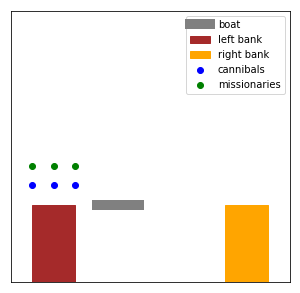

In [9]:
fig,ax=plt.subplots(figsize=(5,5))

#viz banks
leftbank=plt.Rectangle((1,0),2,2,color='brown',
                     label='left bank')
rightbank=plt.Rectangle((10,0),2,2,color='orange',
                       label='right bank')
plt.gca().add_patch(leftbank)
plt.gca().add_patch(rightbank)

ax.scatter([1,2,3],[2.5,2.5,2.5],color='blue',label='cannibals')
ax.scatter([1,2,3],[3,3,3],color='green',label='missionaries')
ax.scatter([],[],color='blue')
ax.scatter([],[],color='green')
bateau=ax.plot([4,5,6],[2,2,2],linewidth=10,color='grey',label='boat')[0]

ax.legend(loc='upper right')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,13)
ax.set_ylim(0,7)

anim=pltani.FuncAnimation(fig,draw_boat,
                          frames=len(process_dijkstra),
                          interval=900,
                          fargs=(ax,process_dijkstra,bateau))
anim.save('missionaries and cannibals.gif')

![alt text](./preview/missionaries and cannibals.gif)